In [323]:
import numpy as np 
import pandas as pd 
from matplotlib.pyplot import subplots
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm 
from ISLP import load_data 
from ISLP.models import (ModelSpec as MS, 
                         summarize, 
                         poly)

In [175]:
# *args allows any number of non-names args to abline
# **kwargs allows any number of named args (like linewidth=3)
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

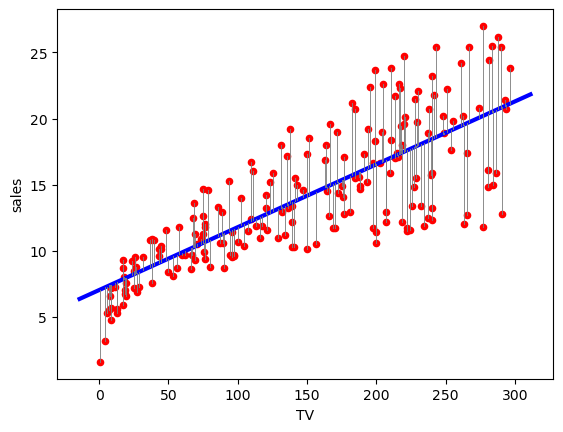

In [176]:
from pathlib import Path 
# get current working directory 
path_to_data = Path.cwd() / 'data'
file = 'Advertising.csv'
advertising = pd.read_csv(path_to_data/file)
# terms = advertising.columns.drop(['sales', 'Unnamed: 0'])
X = MS(['TV']).fit_transform(advertising)
y = advertising['sales']
model = sm.OLS(y, X)
results = model.fit()
ax = advertising.plot.scatter('TV', 'sales', c='red')
abline(ax, 
       results.params.iloc[0], 
       results.params.iloc[1], 
       'b-', 
       linewidth=3)
# Plot the residuals
y_pred = results.fittedvalues
for x, y_actual, y_hat in zip(advertising['TV'], y, y_pred):
    ax.plot([x, x], [y_actual, y_hat], color='gray', linewidth=0.7, alpha=0.9)

***Figure 3.1.***: For the advertising data, the least squares fit for the regression of sales onto TV. Each grey line segment is a residual. 

### Broadcasting review: 
When performing operations on two arrays, NumPy compares their shapes right to left:

1. If the dimensions match (or either is 1), they are compatible.

2. If the dimensions don't match and neither is 1, broadcasting fails.

NumPy virtually stretches any dimension of size 1 to match the other

In [177]:
# Ex. 1 
x = np.array([1, 2, 3])
x + 10                          # Scalar gets broadcast -> [11, 12, 13]

array([11, 12, 13])

In [178]:
# Ex. 2 
a = np.array([[1], [2], [3]])   # (3,1)
b = np.array([10, 20, 30])      # (3,) same as (1,3)
a + b                           # (3, 3)

array([[11, 21, 31],
       [12, 22, 32],
       [13, 23, 33]])

In [179]:
# Ex. 3 Adding singletons for broadcasting an outerproduct
arr1 = np.array([1, 2, 3])                                     # (3, )
print(f"The shape of \n {arr1[:, None]} is \n {arr1[:, None].shape}") # (3,1)
arr2 = np.array([10, 20, 30, 40])                              # (4, )
print(f"The shape of {arr2[None, :]} is {arr2[None, :].shape}")   # (1,4)
outer = arr1[:, None] * arr2[None, :]                             # (3,1) * (1,4) -> (3,4)
print(f"The shape of outer \n {outer} is \n{outer.shape}")

The shape of 
 [[1]
 [2]
 [3]] is 
 (3, 1)
The shape of [[10 20 30 40]] is (1, 4)
The shape of outer 
 [[ 10  20  30  40]
 [ 20  40  60  80]
 [ 30  60  90 120]] is 
(3, 4)


xvals:
[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
  1.66666667  2.77777778  3.88888889  5.        ]
yvals:
[-4.         -3.11111111 -2.22222222 -1.33333333 -0.44444444  0.44444444
  1.33333333  2.22222222  3.11111111  4.        ]

xcoord (x grid):
[[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.777777

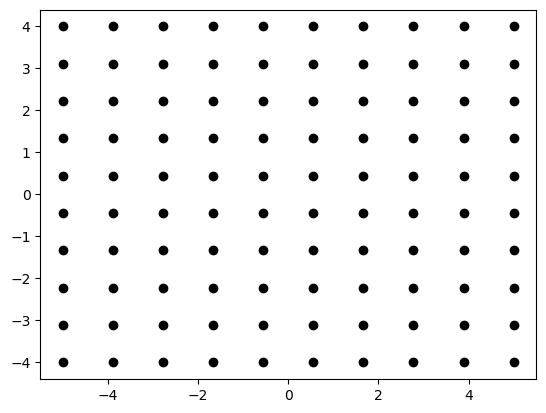

In [180]:
nx, ny = (10,10)
xvals = np.linspace(-5, 5, nx)
yvals = np.linspace(-4, 4, ny)
xcoord, ycoord = np.meshgrid(xvals, yvals)
print(f'xvals:\n{xvals}')
print(f'yvals:\n{yvals}')
print(f'\nxcoord (x grid):\n{xcoord}')
print(f'ycoord (y grid):\n{ycoord}')
fig, ax = subplots()
ax.plot(xcoord, ycoord, 'ko');

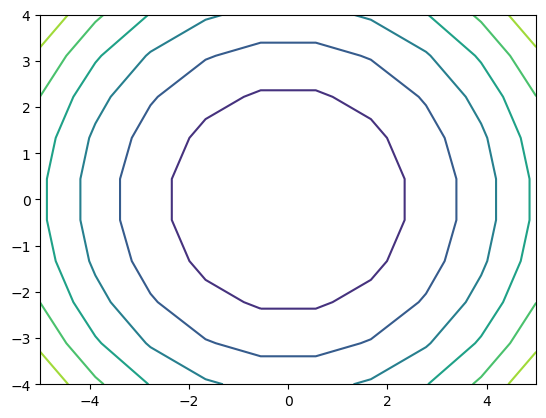

In [181]:
fig, ax = subplots()
z = xcoord**2 + ycoord**2 
ax.contour(xcoord, ycoord, z);

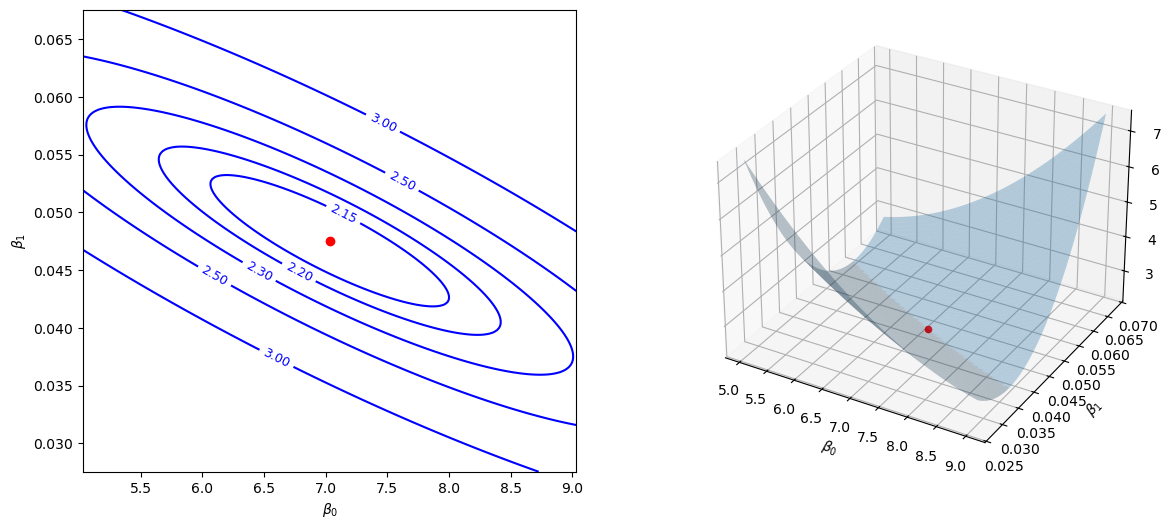

In [182]:
# Let's create an array of equally spaced values around beta0, beta1
beta0 = np.linspace(results.params.iloc[0] - 2, results.params.iloc[0] + 2, 200)
beta1 = np.linspace(results.params.iloc[1] - 0.02, results.params.iloc[1] + 0.02, 200)
beta0c, beta1c = np.meshgrid(beta0, beta1)
x_values = X.values[:,1]
y_values = y.values
y_pred = beta0c[None, :, :] + x_values[:, None, None] * beta1c[None, :, :]
residuals = y_values[:, None, None] - y_pred
rss = np.sum(residuals**2, axis=0)/1000
# To create two subplots with different projections 2D and 3D we need to create each subplot separately with projection
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(121)
CS = ax1.contour(beta0c, beta1c, rss, colors='blue', levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.clabel(CS, fontsize=9, colors='blue')
ax1.scatter(results.params.iloc[0], results.params.iloc[1], color='red')
ax2 = fig.add_subplot(122, projection='3d')
# alpha will change the opacity of the surface
ax2.plot_surface(beta0c, beta1c, rss, rstride=3, cstride=3, alpha=0.3)
ax2.scatter3D(results.params.iloc[0], results.params.iloc[1], rss.min(), color='red')
ax2.view_init(elev=30, azim=-60)
ax2.set_zlim(rss.min(), rss.max())
for ax in fig.axes: 
    ax.set_xlabel(r"$\beta_0$")
    ax.set_ylabel(r"$\beta_1$")
ax2.set_zlabel(r"$RSS$")
#plt.subplots_adjust(wspace=0.1)
plt.show()

In [183]:
# More modular versions of above code 
def compute_rss_surface(b0_range, b1_range, x_values, y_values, scale=1000.0):
    """
    Compute a 2D grid of RSS for intercept (b0) and slope (b1) values.
    
    Parameters
    ----------
    b0_range : np.ndarray
        1D array of possible beta0 (intercept) values.
    b1_range : np.ndarray
        1D array of possible beta1 (slope) values.
    x_values : np.ndarray
        Flattened feature array, shape (n_samples,).
    y_values : np.ndarray
        Target array, shape (n_samples,).
    scale : float
        Factor to divide raw RSS by (purely for nicer plotting ranges).

    Returns
    -------
    B0, B1 : np.ndarray
        Meshgrid of shape (len(b1_range), len(b0_range)) for intercept & slope.
    rss : np.ndarray
        RSS at each (b0, b1) point, same shape as B0 & B1.
    """
    B0, B1 = np.meshgrid(b0_range, b1_range)  # (n_b1, n_b0)
    
    # Broadcast x and (b0, b1) to compute predictions
    y_pred = B0[None, :, :] + x_values[:, None, None] * B1[None, :, :]
    residuals = y_values[:, None, None] - y_pred
    
    rss_raw = np.sum(residuals**2, axis=0)  # (n_b1, n_b0)
    rss = rss_raw / scale
    return B0, B1, rss

In [184]:
def plot_contour_and_surface(B0, B1, rss, b0_est, b1_est, levels=None):
    """
    Display a 2D contour of RSS and a 3D surface side by side.

    Parameters
    ----------
    B0, B1 : np.ndarray
        Meshgrids for beta0, beta1 (shapes match rss).
    rss : np.ndarray
        2D array of RSS values.
    b0_est, b1_est : float
        Highlighted "solution" point on both plots.
    levels : list of floats, optional
        Specific contour levels; if None, uses default levels.
    """
    # Create two subplots: left (2D), right (3D)
    fig = plt.figure(figsize=(14, 6))
    
    # --- (1) 2D Contour ---
    ax1 = fig.add_subplot(1, 2, 1)
    if levels is None:
        contour = ax1.contour(B0, B1, rss, cmap='viridis')
    else:
        contour = ax1.contour(B0, B1, rss, levels=levels, colors='blue')
        ax1.clabel(contour, fontsize=9, colors='blue')
    ax1.scatter(b0_est, b1_est, color='red', label='OLS Est.')
    ax1.set_xlabel(r"$\beta_0$")
    ax1.set_ylabel(r"$\beta_1$")
    ax1.set_title("RSS Contour")
    ax1.legend()
    ax1.grid(True)
    
    # --- (2) 3D Surface ---
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_surface(B0, B1, rss, rstride=3, cstride=3, alpha=0.3)
    ax2.scatter3D(b0_est, b1_est, rss.min(), color='red')
    ax2.set_xlabel(r"$\beta_0$")
    ax2.set_ylabel(r"$\beta_1$")
    ax2.set_zlabel("RSS")
    ax2.view_init(elev=30, azim=-60)
    ax2.set_title("RSS Surface")
    
    plt.tight_layout()
    plt.show()

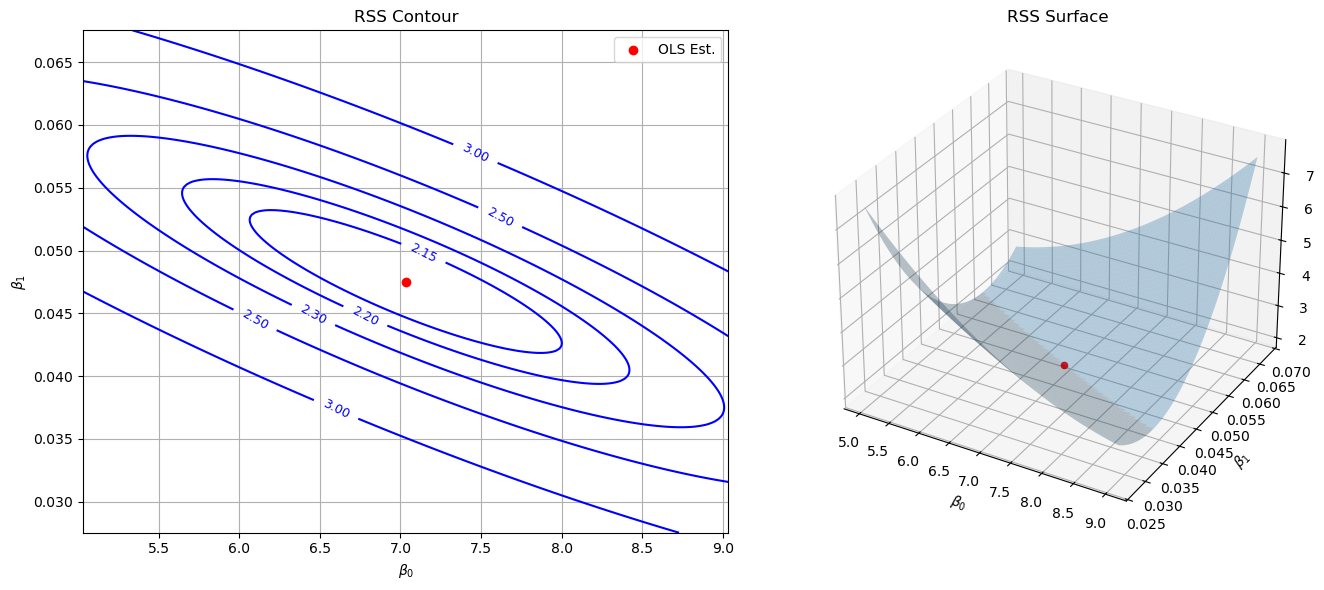

In [185]:

# b0_est and b1_est: from your fitted model, e.g. statsmodels OLS
b0_est = results.params.iloc[0]
b1_est = results.params.iloc[1]

# Ranges for beta0, beta1 around the estimated solution
b0_range = np.linspace(b0_est - 2, b0_est + 2, 200)
b1_range = np.linspace(b1_est - 0.02, b1_est + 0.02, 200)

# Compute the RSS surface
B0, B1, rss = compute_rss_surface(
    b0_range, b1_range, 
    x_values=X.values[:, 1],  # assume X[:,1] is your single feature
    y_values=y.values,
    scale=1000.0
)

# Plot both contour (2D) and surface (3D)
plot_contour_and_surface(B0, B1, rss, b0_est, b1_est, levels=[2.15, 2.2, 2.3, 2.5, 3])

***Figure 3.2.*** Contour and three-dimensional plots of the RSS on the
Advertising data, using sales as the response and TV as the predictor. The
red dots correspond to the least squares estimates $\beta_0$ and $\beta_1$.

In [186]:
# Noise level
sigma = 5 
# Sample size 
n = 100
# Noise for model 
noise = np.random.normal(0, sigma, n)
# Sample 100 points for X  
X = np.random.uniform(-3, 3, n)
y_data = 3 * X + 2 + noise
y_actual = 3 * X + 2 
model = sm.OLS(y_data, np.column_stack((np.ones(n), X)))   
results = model.fit()
results.params

array([1.80742353, 2.896923  ])

In [187]:
def plot_k_fits(ax, k, n, sigma, *args, **kwargs):
    for _ in range(k):
        X = np.random.uniform(-3, 3, n)
        noise = np.random.normal(0, sigma, n)
        y_data = 3 * X + 2 + noise

        # Design matrix with intercept
        X_design = np.column_stack((np.ones(n), X))
        model = sm.OLS(y_data, X_design)
        results = model.fit()

        # Use fixed x range for consistency
        x_vals = np.linspace(-3, 3, 100)
        y_vals = results.params[0] + results.params[1] * x_vals

        ax.plot(x_vals, y_vals, *args, **kwargs)

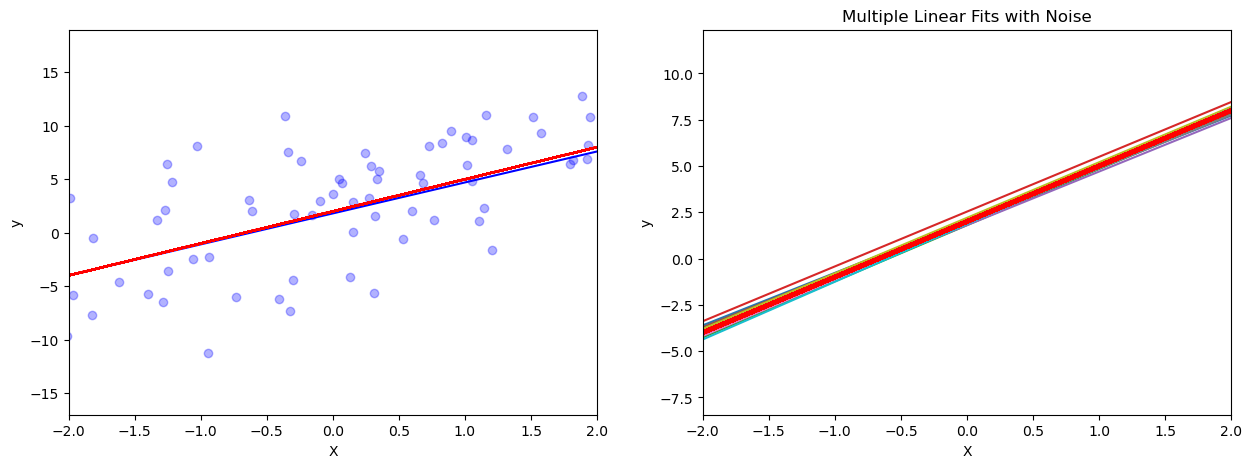

In [188]:
fig, ax = subplots(ncols=2, figsize=(15,5))
ax[0].scatter(X, y_data, color='blue', alpha=0.3)
abline(ax[0], 
       results.params[0], 
       results.params[1],
       'b')
ax[0].plot(X, y_actual, color='red')
ax[0].set_xlim(-2, 2)
ax[0].set_xlabel('X')
ax[0].set_ylabel('y')
plot_k_fits(ax[1], k=10, n=100, sigma=2)
ax[1].plot(X, y_actual, color='red', linewidth=3)
ax[1].set_xlim(-2, 2)
ax[1].set_title('Multiple Linear Fits with Noise')
ax[1].set_xlabel('X')
ax[1].set_ylabel('y');



***Figure 3.3.*** A simulated data set. Left: The red line represents the true
relationship, $f(X) = 2 + 3X$, which is known as the population regression line.
The blue line is the least squares line; it is the least squares estimate for $f(X)$
based on the observed data, shown in black. Right: The population regression line
is again shown in red, and the least squares line in dark blue. In light blue, ten
least squares lines are shown, each computed on the basis of a separate random
set of observations. Each least squares line is different, but on average, the least
squares lines are quite close to the population regression line.

In [200]:
X = MS(['TV']).fit_transform(advertising)
y = advertising['sales']
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,7.0326,0.458,15.360,0.0
TV,0.0475,0.003,17.668,0.0


***Table 3.1.*** For the Advertising data, coefficients of the least squares model
for the regression of number of units sold on TV advertising budget. An increase
of $1,000 in the TV advertising budget is associated with an increase in sales by
around 50 units. (Recall that the sales variable is in thousands of units, and the
TV variable is in thousands of dollars.)

In [201]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           1.47e-42
Time:                        16:52:04   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Table 3.2.*** For the Advertising data, more information about the least
squares model for the regression of number of units sold on TV advertising budget.

### Simple Regression Case for Radio and Newspaper

In [206]:
X = MS(['radio']).fit_transform(advertising)
y = advertising['sales']
model = sm.OLS(y, X)
results = model.fit()
results.summary().tables[1]a

,coef,std err,t,P>|t|,[0.025,0.975]
intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [207]:
X = MS(['newspaper']).fit_transform(advertising)
y = advertising['sales']
model = sm.OLS(y, X)
results = model.fit()
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


***Table 3.3. and 3.4.***
A $1,000 increase in spending on radio advertising is associated with an average increase in sales by around 203 units, while the same increase in spending on newspaper advertising is associated with an average increase in sales by around 55 units. (Note that the sales variable is in thousands of units, and the radio and newspaper variables are in thousands of dollars.)



### Multiple Regression Case

In [211]:
X = MS(['TV', 'radio', 'newspaper']).fit_transform(advertising)
y = advertising['sales']
model = sm.OLS(y, X)
results = model.fit()
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
radio,0.1885,0.009,21.893,0.000,0.172,0.206
newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


***Table 3.4.*** For the Advertising data, least squares coefficient estimates of the
multiple linear regression of number of units sold on TV, radio, and newspaper
advertising budgets.

#### From ISLR p.82: 

"Table 3.4 displays the multiple regression coefficient estimates when TV,
radio, and newspaper advertising budgets are used to predict product sales
using the Advertising data. We interpret these results as follows: for a given
amount of TV and newspaper advertising, spending an additional $1,000 on
radio advertising is associated with approximately 189 units of additional
sales. Comparing these coefficient estimates to those displayed in Tables 3.1
and 3.3, we notice that the multiple regression coefficient estimates for
TV and radio are pretty similar to the simple linear regression coefficient
estimates. However, while the newspaper regression coefficient estimate in
Table 3.3 was significantly non-zero, the coefficient estimate for newspaper
in the multiple regression model is close to zero, and the corresponding p-
value is no longer significant, with a value around 0.86. This illustrates that
the simple and multiple regression coefficients can be quite different. This
difference stems from the fact that in the simple regression case, the slope
term represents the average increase in product sales associated with a
$1,000 increase in newspaper advertising, ignoring other predictors such as
TV and radio. By contrast, in the multiple regression setting, the coefficient
for newspaper represents the average increase in product sales associated
with increasing newspaper spending by $1,000 while holding TV and radio
fixed."

In [236]:
# How to drop a column from a dataframe. 
df = pd.DataFrame(np.arange(12).reshape(3, 4),
                  columns=['A', 'B', 'C', 'D'])
# Doesn't change the original dataframe. 
df.drop(columns=['A'])

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [234]:
from pathlib import Path 
# get current working directory 
path_to_data = Path.cwd() / 'data'
file = 'Advertising.csv'
advertising = pd.read_csv(path_to_data/file)
# advertising = advertising.drop(columns=['Unnamed: 0']) 
# changes original dataframe. 
advertising.drop(columns=['Unnamed: 0'], inplace=True) # slightly more efficient
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


***Table 3.5***. Correlation matrix for TV, radio, newspaper, and sales for the
Advertising data.

#### From ISLR p.83: 

"Does it make sense for the multiple regression to suggest no relationship
between sales and newspaper while the simple linear regression implies the opposite? In fact it does. Consider the correlation matrix for the three
predictor variables and response variable, displayed in Table 3.5. Notice
that the correlation between radio and newspaper is 0.35. This indicates
that markets with high newspaper advertising tend to also have high ra-
dio advertising. Now suppose that the multiple regression is correct and
newspaper advertising is not associated with sales, but radio advertising
is associated with sales. Then in markets where we spend more on radio
our sales will tend to be higher, and as our correlation matrix shows, we
also tend to spend more on newspaper advertising in those same mar-
kets. Hence, in a simple linear regression which only examines sales versus
newspaper, we will observe that higher values of newspaper tend to be as-
sociated with higher values of sales, even though newspaper advertising is
not directly associated with sales. So newspaper advertising is a surrogate
for radio advertising; newspaper gets “credit” for the association between
radio on sales."


In [311]:
# Multiple regression fit using predictors 'radio' and 'TV' 
X = MS(['TV', 'radio']).fit_transform(advertising)
y = advertising['sales']
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,2.9211,0.294,9.919,0.0
TV,0.0458,0.001,32.909,0.0
radio,0.1880,0.008,23.382,0.0


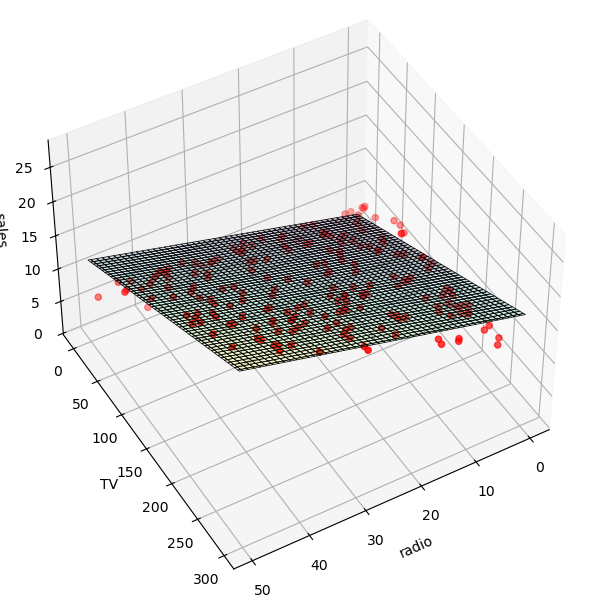

In [312]:
def compute_regression_coefficients(df, response, *features):
    X = MS(list(features)).fit_transform(df)
    y = df[response]
    model = sm.OLS(y, X)
    results = model.fit()
    return results.params

coeffs = compute_regression_coefficients(advertising, 'sales', 'radio', 'TV')
    
def plot_3d_surface(df, coeffs, *features, response='sales', res=100):
    #grid_axes = [np.arange(0, df[feature].max()) for feature in features]
    grid_axes = [np.linspace(0, df[feature].max(), res) for feature in features]
    x1, x2 = np.meshgrid(*grid_axes)
    y_hat = coeffs.iloc[0] + coeffs.iloc[1] * x1 + coeffs.iloc[2] * x2 
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(x1, x2, y_hat, cmap='viridis', edgecolor='k', linewidth=0.5, 
                    alpha=0.2)
    f1, f2 = features
    ax.scatter3D(df[f1], df[f2], df[response], color='red')
    ax.set_xlabel(f1)
    ax.set_ylabel(f2)
    ax.set_zlabel(response)
    ax.view_init(elev=45, azim=60)
    plt.tight_layout()
    plt.show()

plot_3d_surface(advertising, coeffs, 'radio', 'TV');


***Figure 3.5.*** For the Advertising data, a linear regression fit to sales using TV and radio as predictors. From the pattern of the residuals, we can see that there is a pronounced non-linear relationship in the data. The positive residuals (those visible above the surface), tend to lie along the 45-degree line, where TV and Radio budgets are split evenly. The negative residuals (most not visible), tend to lie away from this line, where budgets are more lopsided.

In [350]:
from pathlib import Path 
path_to_data = Path.cwd() / 'data'
file = 'Credit.csv'
credit = pd.read_csv(path_to_data/file)
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


In [351]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [357]:
# Change 'object' columns to 'category'
# df.apply(func) applies func to each column (by default)
credit = credit.apply(lambda col: col.astype('category') 
                      if col.dtype == 'object' else col)
credit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Income     400 non-null    float64 
 1   Limit      400 non-null    int64   
 2   Rating     400 non-null    int64   
 3   Cards      400 non-null    int64   
 4   Age        400 non-null    int64   
 5   Education  400 non-null    int64   
 6   Own        400 non-null    category
 7   Student    400 non-null    category
 8   Married    400 non-null    category
 9   Region     400 non-null    category
 10  Balance    400 non-null    int64   
dtypes: category(4), float64(1), int64(6)
memory usage: 24.1 KB


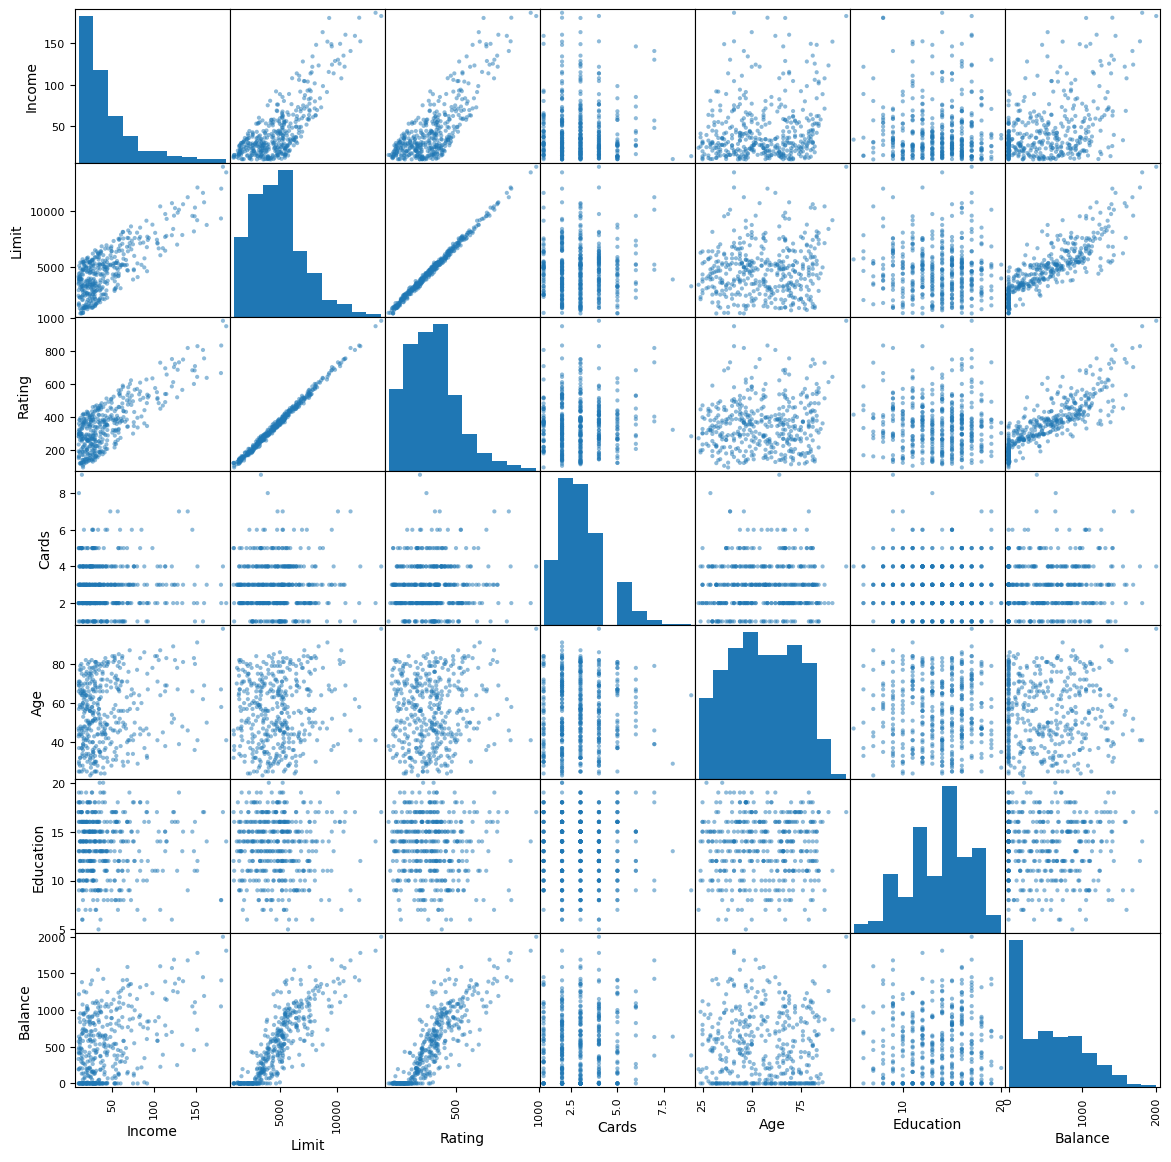

In [358]:
pd.plotting.scatter_matrix(credit, figsize=(14, 14));

***Figure 3.6.*** Each panel of Figure 3.6 is a scatterplot for a pair of variables whose identities are given by the corresponding row and column labels. For example,the scatterplot directly to the right of the word “Balance” depicts balance versus age, while the plot directly to the right of “Age” corresponds to
age versus cards. In addition to these quantitative variables, we also have
four qualitative variables: own (house ownership), student (student status),
status (marital status), and region (East, West or South). 

### Setup for Table 3.7. (Categorical Variables)
Suppose that we wish to investigate differences in credit card balance between those who own a house and those who don’t, ignoring the other variables for the moment. If a qualitative predictor (also known as a *factor*) only has two levels, or possible values, then incorporating it into a regression model is very simple. 

We simply create an **indicator** or **dummy variable** that takes on two possible numerical values. For example, based on the variable `Own`, we can define a new variable:

$$
x_i = 
\begin{cases}
1 & \text{if the $i$th person owns a house} \\\\
0 & \text{if the $i$th person does not own a house}
\end{cases}
\tag{1}
$$

We then use this variable as a predictor in the regression model:

$$
y_i = \beta_0 + \beta_1 x_i + \varepsilon_i =
\begin{cases}
\beta_0 + \beta_1 + \varepsilon_i & \text{if the $i$th person owns a house} \\\\
\beta_0 + \varepsilon_i & \text{if the $i$th person does not}
\end{cases}
\tag{2}
$$

Here, $\beta_0$ represents the **average credit card balance among non-owners**, $\beta_0 + \beta_1$ is the **average balance among owners**, and $\beta_1$ is the **average difference in balance between owners and non-owners**.


In [360]:
X = MS(['Own']).fit_transform(credit)
y = credit['Balance']
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,509.8031,33.128,15.389,0.000
Own[Yes],19.7331,46.051,0.429,0.669


***Table 3.7.*** Displays the coefficient estimates and other information associated with the model. The average credit card debt for non-owners is estimated to be $509.80, whereas owners are estimated to carry $19.73 in additional debt for a total of $509.80 + $19.73 = $529.53. However, we notice that the p-value for the dummy variable is very high. This indicates that there is no statistical evidence of a difference in average credit card balance based on house ownership.

### Setup for Table 3.8. (Categorical Variables with More Than 1 Level)

When a qualitative predictor has more than two levels, a single dummy
variable cannot represent all possible values. In this situation, we can create
additional dummy variables. For example, for the **region** variable we create
two dummy variables. The first could be

$$
x_{i1} = 
\begin{cases}
1 & \text{if the $i$th person is from the South} \\\\
0 & \text{if the $i$th person is not from the South,}
\end{cases}
\tag{3}
$$

and the second could be 

$$
x_{i2} = 
\begin{cases}
1 & \text{if the $i$th person is from the West} \\\\
0 & \text{if the $i$th person is not from the West,}
\end{cases}
\tag{4}
$$

Then both of these variables can be used in the regression equation to obtain the model:

$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \varepsilon_i =
\begin{cases}
\beta_0 + \beta_1 + \varepsilon_i & \text{if the $i$th person is from the South} \\\\
\beta_0 + \beta_2 + \varepsilon_i & \text{if the $i$th person is from the West} \\\\
\beta_0 + \varepsilon_i & \text{if the $i$th person is from the East}
\end{cases}
\tag{5}
$$

Here:

- $\beta_0$ represents the **average credit card balance** for individuals from the **East**.
- $\beta_1$ is the **difference** in average balance between people from the **South** and those from the East.
- $\beta_2$ is the **difference** between those from the **West** and the East.

There will always be **one fewer dummy variable than the number of levels**. The level with no dummy variable—**East** in this example—is called the **baseline**.

In [363]:
X = MS(['Region']).fit_transform(credit)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,531.0000,46.319,11.464,0.000
Region[South],-12.5025,56.681,-0.221,0.826
Region[West],-18.6863,65.021,-0.287,0.774


***Table 3.8.*** The estimated balance for the baseline, East,
is $531.00. It is estimated that those in the South will have $18.69 less
debt than those in the East, and that those in the West will have $12.50
less debt than those in the East. However, the p-values associated with the
coefficient estimates for the two dummy variables are very large, suggesting
no statistical evidence of a real difference in average credit card balance
between South and East or between West and East.12 Once again, the
level selected as the baseline category is arbitrary, and the final predictions
for each group will be the same regardless of this choice. However, the
coefficients and their p-values do depend on the choice of dummy variable
coding. Rather than rely on the individual coefficients, we can use an F -test
to test $H_0 : \beta_1 = \beta_2 = 0$; this does not depend on the coding. This F-test has a p-value of 0.96, indicating that we cannot reject the null hypothesis that there is no relationship between balance and region.

### Setup for Table 3.9. (Interaction Term)

One way of extending this model is to include a **third predictor**, called an **interaction term**, which is constructed by multiplying $X_1$ and $X_2$. This gives the model:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2 + \varepsilon
\tag{3.31}
$$

How does the inclusion of this interaction term **relax the additive assumption**?

Note that equation (3.31) can be rewritten as:

$$
Y = \beta_0 + (\beta_1 + \beta_3 X_2) X_1 + \beta_2 X_2 + \varepsilon
\tag{3.32}
$$

Letting:

$$
\tilde{\beta}_1 = \beta_1 + \beta_3 X_2,
$$

we can see that $\tilde{\beta}_1$ is now a **function of $X_2$**. This means that the **effect of $X_1$ on $Y$** depends on the value of $X_2$ — the association between $X_1$ and $Y$ is no longer constant.

Similarly, the effect of $X_2$ on $Y$ also depends on the value of $X_1$. Therefore, the model allows for **interaction between the predictors**, relaxing the assumption that their effects are strictly additive.

We now return to the **Advertising** example. A linear model that uses `radio`, `TV`, and an **interaction** between the two to predict `sales` takes the form:

$$
\text{sales} = \beta_0 + \beta_1 \cdot \text{TV} + \beta_2 \cdot \text{radio} + \beta_3 \cdot (\text{radio} \times \text{TV}) + \varepsilon
$$

This can be rewritten as:

$$
\text{sales} = \beta_0 + (\beta_1 + \beta_3 \cdot \text{radio}) \cdot \text{TV} + \beta_2 \cdot \text{radio} + \varepsilon
\tag{3.33}
$$

From this form, we can interpret $\beta_3$ as the **change in the effectiveness of TV advertising** associated with a **one-unit increase in radio advertising** — or vice versa.

That is, the **marginal effect** of TV on sales depends on the level of radio advertising, and vice versa, due to the interaction term. This captures a **non-additive** relationship between the two predictors.



In [367]:
X = MS(['TV', 'radio',('TV', 'radio')]).fit_transform(advertising)
y = advertising['sales']
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.7502,0.248000,27.233,0.000
TV,0.0191,0.002000,12.699,0.000
radio,0.0289,0.009000,3.241,0.001
TV:radio,0.0011,0.000052,20.727,0.000


***Table 3.9.*** 
The results in Table 3.9 strongly suggest that the model that includes the interaction term is superior to the model that contains only main effects. The p-value for the interaction term, TV×radio, is extremely low, indicating that there is strong evidence for $H_a: \beta_3 \ne 0$. In other words, it is clear that the true relationship is not additive. The R2 for the model (3.33) is 96.8 %, compared to only 89.7 % for the model that predicts sales using TV and radio without an interaction term. This means that (96.8− 89.7)/(100−89.7) = 69 % of the variability in sales that remains after fitting the additive model has been explained by the interaction term. 

The coefficient estimates in Table 3.9 suggest that an increase in TV advertising of \$1,000 is associated with increased sales of $(\beta_1 + \beta_3 \cdot \text{radio}) \cdot 1{,}000 = 19 + 1.1 \cdot \text{radio}$ units. Similarly, an increase in radio advertising of \$1,000 will be associated with an increase in sales of $(\beta_2 + \beta_3 \cdot \text{TV}) \cdot 1{,}000 = 29 + 1.1 \cdot \text{TV}$ units.


In this example, the p-values associated with TV, radio, and the interaction term all are statistically significant (Table 3.9), and so it is obvious
that all three variables should be included in the model. However, it is
sometimes the case that an interaction term has a very small p-value, but
the associated main effects (in this case, TV and radio) do not. 

The **hierarchical principle** states that if we include an **interaction** in a model, we should also include the **main effects**, even if the $p$-values associated with their coefficients are not significant.

In other words, if the interaction between $X_1$ and $X_2$ appears important, then we should include both $X_1$ and $X_2$ in the model—even if their coefficient estimates have large $p$-values.

The rationale for this principle is that if $X_1 \times X_2$ is related to the response, then whether or not the coefficients of $X_1$ or $X_2$ are exactly zero is of little interest.

Additionally, $X_1 \times X_2$ is typically **correlated** with both $X_1$ and $X_2$, and omitting the main effects can distort or misrepresent the meaning of the interaction term.


### Setup for Fig. 3.7.
Consider the **Credit** data set from Section 3.3.1, and suppose that we wish to predict `balance` using the `income` (quantitative) and `student` (qualitative) variables.

In the absence of an interaction term, the model takes the form:

$$
\text{balance}_i \approx \beta_0 + \beta_1 \cdot \text{income}_i + 
\begin{cases}
\beta_2 & \text{if the } i\text{th person is a student} \\
0 & \text{if not}
\end{cases}
$$

Equivalently, we can write:

$$
\text{balance}_i = 
\begin{cases}
\beta_0 + \beta_2 + \beta_1 \cdot \text{income}_i & \text{if student} \\
\beta_0 + \beta_1 \cdot \text{income}_i & \text{if not}
\end{cases}
$$

This amounts to fitting two **parallel lines** to the data: one for students and one for non-students. The lines differ only in intercept — $\beta_0 + \beta_2$ for students, and $\beta_0$ for non-students — but they share the same slope $\beta_1$.

This implies that the **average effect of income on balance is the same** regardless of student status — a limitation if the income effect differs between the groups.

To address this limitation, we add an **interaction term** by multiplying `income` with the student dummy variable. The model becomes:

$$
\text{balance}_i \approx \beta_0 + \beta_1 \cdot \text{income}_i + 
\begin{cases}
\beta_2 + \beta_3 \cdot \text{income}_i & \text{if student} \\
0 & \text{if not}
\end{cases}
$$

Which simplifies to:

$$
\text{balance}_i = 
\begin{cases}
(\beta_0 + \beta_2) + (\beta_1 + \beta_3) \cdot \text{income}_i & \text{if student} \\
\beta_0 + \beta_1 \cdot \text{income}_i & \text{if not}
\end{cases}
$$

Now, both the **intercept and slope** vary depending on student status, allowing the model to capture differences in how income affects balance for students versus non-students.


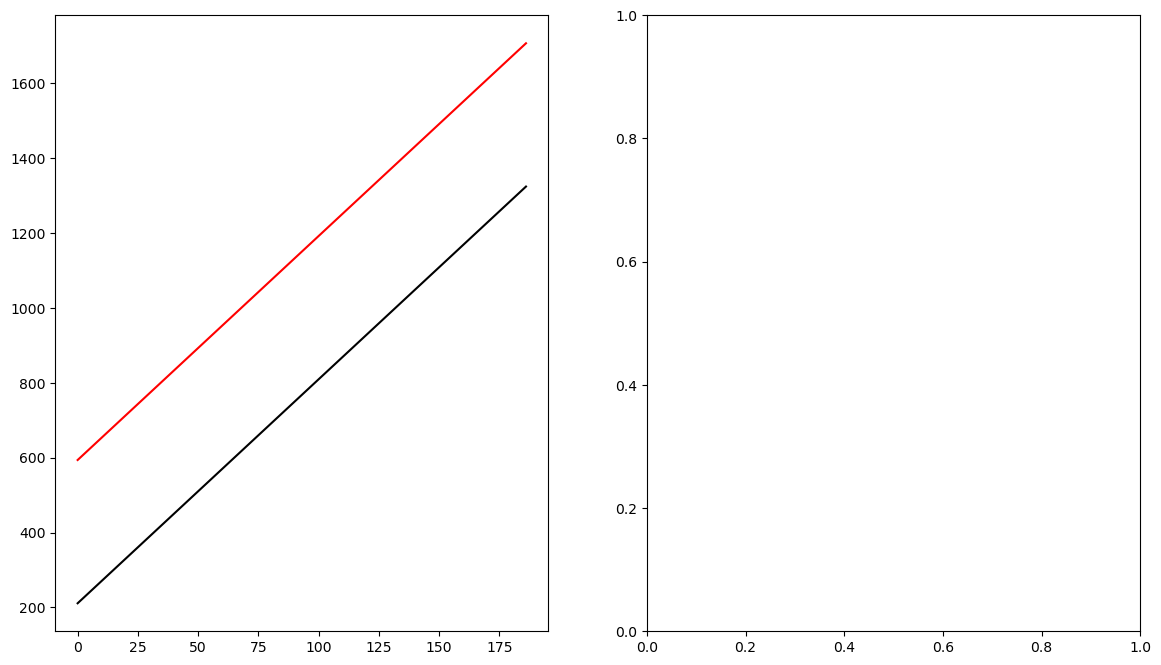

In [387]:
# without interaction term 
X1 = MS(['Income', 'Student']).fit_transform(credit)
# with interaction term 
X2 = MS(['Income', 'Student', ('Income', 'Student')]).fit_transform(credit)
y = credit['Balance']
income = np.arange(0, credit['Income'].max())
model1 = sm.OLS(y, X1)
results1 = model1.fit()
balance1_s = results1.params.iloc[0] + results1.params.iloc[1] * income + results1.params.iloc[2]
balance1_ns = results1.params.iloc[0] + results1.params.iloc[1] * income
model2 = sm.OLS(y, X2)
results2 = model2.fit()
fig, ax = subplots(ncols=2, figsize=(14, 8))
ax[0].plot(income, balance1_s, color='red', label='Student')
ax[0].plot(income, balance1_ns, color='black', label='Non-Student')